In [160]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from IPython.display import display
import scipy.stats as stats
import matplotlib.pyplot as plt
import pyreadstat
import seaborn as sns
from linearmodels.iv import IV2SLS

PART I

In [161]:
y1file_path = "/Users/markoshea/Desktop/Working Directories/Datasets/Y1.dta"
y1df = pd.read_stata(y1file_path)
y2file_path = "/Users/markoshea/Desktop/Working Directories/Datasets/Y2.dta"
y2df = pd.read_stata(y2file_path)

In [162]:
y1df

,studentid,std,schoolid,div,cal,pre_tot,mid_tot,post_tot,pre_verb,pre_math,...,bal,divid,numstud,post_mathnorm,post_verbnorm,pre_totnorm,mid_totnorm,post_totnorm,male,year
0,91,3,348,B,T,10,11.0,16.0,5,5,...,0,33480.0,58,-0.691608,0.017376,-0.690871,-0.640294,-0.387408,1.0,2002.0
1,92,3,348,B,T,31,60.0,NaN,16,15,...,0,33480.0,58,NaN,NaN,0.371252,1.837995,NaN,1.0,2002.0
2,94,3,348,A,T,9,NaN,7.0,4,5,...,0,33480.0,58,-0.868330,-0.709282,-0.741449,NaN,-0.842603,1.0,2002.0
3,106,3,348,A,T,0,9.0,25.0,0,0,...,0,33480.0,58,-0.868330,1.159268,-1.196645,-0.741449,0.067788,0.0,2002.0
4,107,3,348,A,T,11,NaN,0.0,1,10,...,0,33480.0,58,-1.133412,-1.124515,-0.640294,NaN,-1.196645,0.0,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,64041293,4,640,A,T,53,64.0,64.0,25,28,...,0,46400.0,27,0.729799,1.432999,0.609391,1.132569,1.132569,0.0,2002.0
9741,64041313,4,640,A,T,55,77.0,62.0,25,30,...,0,46400.0,27,0.643240,1.339835,0.704515,1.750870,1.037446,0.0,2002.0
9742,64041323,4,640,A,T,49,72.0,56.0,22,27,...,0,46400.0,27,0.556681,0.874013,0.419145,1.513062,0.752076,0.0,2002.0
9743,64041333,4,640,A,T,37,63.0,59.0,16,21,...,0,46400.0,27,-0.049231,1.805657,-0.151595,1.085008,0.894761,0.0,2002.0


In [163]:
# load dataset y1 using python equivalent of describe command in Stata
y1df_df, meta = pyreadstat.read_dta(y1file_path, metadataonly=True)

if meta.column_labels:
    print("Variable Labels (Descriptions):")
    for var, label in zip(meta.column_names, meta.column_labels):
        print(f"{var}: {label}")
else:
    print("No variable labels found in the dataset.")

Variable Labels (Descriptions):
studentid: Student ID
std: Grade
schoolid: School ID
div: Division code
cal: CALTC
pre_tot: Absolute total score on pre-test
mid_tot: Absolute total score on mid-test
post_tot: Absolute total score on post-test
pre_verb: Absolute verbal score on pre-test
pre_math: Absolute math score on pre-test
mid_verb: Absolute verbal score on mid-test
mid_math: Absolute math score on mid-test
post_verb: Absolute verbal score on post-test
post_math: Absolute math score on post-test
bal: Dummy for balsakhi treatment
divid: Unique for school, grade
numstud: Number of students in school-grade
post_mathnorm: Normalized math score on post-test
post_verbnorm: Normalized verbal score on post-test
pre_totnorm: Normalized total score on pre-test
mid_totnorm: Normalized total score on mid-test
post_totnorm: Normalized total score on post-test
male: None
year: None


In [164]:
y2df

,studentid,div,std,schoolid,divid,pre_tot,mid_tot,post_tot,pre_verb,mid_verb,...,both,male,numstud,balsakhi,post_mathnorm,post_verbnorm,pre_totnorm,mid_totnorm,post_totnorm,year
0,1,A,3,514,35140.0,15,47.0,56.0,7,19.0,...,0,1,57,0,1.814611,2.368274,-0.232094,1.708464,2.254246,2003.0
1,3,A,3,514,35140.0,5,7.0,14.0,3,4.0,...,0,1,57,0,-0.321306,-0.213418,-0.838519,-0.717234,-0.292737,2003.0
2,4,A,3,514,35140.0,67,74.0,84.0,27,34.0,...,0,1,57,0,4.057325,3.189722,2.921314,3.345811,3.952235,2003.0
3,7,A,3,514,35140.0,7,10.0,9.0,7,5.0,...,0,1,57,0,-0.534898,-0.565467,-0.717234,-0.535306,-0.595949,2003.0
4,8,A,3,514,35140.0,8,26.0,0.0,8,7.0,...,0,1,57,0,-0.855286,-1.269565,-0.656591,0.434973,-1.141731,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11859,17483,A,3,527,35270.0,20,NaN,36.0,11,NaN,...,0,1,60,0,0.853448,1.077428,0.071118,NaN,1.041397,2003.0
11860,17494,A,3,119,31190.0,0,NaN,NaN,0,NaN,...,0,0,41,0,NaN,NaN,-1.141731,NaN,NaN,2003.0
11861,17495,A,3,527,35270.0,18,30.0,41.0,9,21.0,...,0,1,60,0,1.814611,0.608030,-0.050167,0.677543,1.344610,2003.0
11862,17497,A,4,315,43150.0,67,NaN,NaN,33,NaN,...,0,0,36,0,NaN,NaN,1.746789,NaN,NaN,2003.0


In [165]:
# load dataset y2 using python equivalent of describe command in Stata
y2df_meta, meta = pyreadstat.read_dta(y2file_path, metadataonly=True)

if meta.column_labels:
    print("Variable Labels (Descriptions):")
    for var, label in zip(meta.column_names, meta.column_labels):
        print(f"{var}: {label}")
else:
    print("No variable labels found in the dataset.")

Variable Labels (Descriptions):
studentid: Student ID
div: Division code
std: Grade
schoolid: School ID
divid: Unique for school, grade
pre_tot: Absolute total score on pre-test
mid_tot: Absolute total score on mid-test
post_tot: Absolute total score on post-test
pre_verb: Absolute verbal score on pre-test
mid_verb: Absolute verbal score on mid-test
post_verb: Absolute verbal score on post-test
pre_math: Absolute math score on pre-test
mid_math: Absolute math score on mid-test
post_math: Absolute math score on post-test
bal: Dummy for balsakhi treatment
cal: Dummy for cal treatment
both: bal * cal
male: Male
numstud: Number of students in school-grade
balsakhi: Dummy for stud getting balsakhi
post_mathnorm: Normalized math score on post-test
post_verbnorm: Normalized verbal score on post-test
pre_totnorm: Normalized total score on pre-test
mid_totnorm: Normalized total score on mid-test
post_totnorm: Normalized total score on post-test
year: None


Q1 (a)

India's primary education system has faced challenges: as the article succinctly puts in, as many as 44% of children aged 7-12 cannot read a basic paragraph and 50% cannot do simple subtraction. Finding cost-effective ways to boost returns to education has apparently proved difficult. Ironically, perhaps in part because absenteeism is not an issue, many schools have a large number of students in attendance with diverse backgrounds, so issues such as native language and parental guidance can make it difficult for investing in resources such as textbooks or additional teachers to provide much additional benefit. 

The purpose of this study was to determine how India might aid struggling students in particular and measured the effects of two intervantion strategies: (1) hiring young women 'balsakhis' to provide basic literacy and numerical education and (2) providing computers to students with equipped with math-related educational software. The authors sought to determine how these changes might boost educational attainment for struggling students as measured by average test score.

In [166]:
control_vars = ['male', 'pre_tot', 'pre_verb', 'pre_math']

balance_table = y1df.groupby('bal')[control_vars].mean().T
balance_table.columns = ['Control', 'Treatment']
balance_table['Difference'] = balance_table['Treatment'] - balance_table['Control']

#t-tests and collect p-values
p_values = []
for var in control_vars:
    treated = y1df[y1df['bal'] == 1][var]
    control = y1df[y1df['bal'] == 0][var]
    _, p_val = stats.ttest_ind(treated, control, nan_policy='omit')
    p_values.append(p_val)

balance_table['p-value'] = p_values

display(balance_table)


,Control,Treatment,Difference,p-value
male,0.482225,0.500839,0.018614,0.066170
pre_tot,32.297048,31.956148,-0.340900,0.444586
pre_verb,14.351878,14.436425,0.084547,0.698593
pre_math,17.945170,17.519723,-0.425447,0.091243


In [167]:
balance_results = []

for var in control_vars:
    X = sm.add_constant(y1df['bal']) 
    y = y1df[var]
    
    model = sm.OLS(y, X, missing='drop').fit()
    
    #coefficient, standard error, and p-value
    coef = model.params['bal']
    se = model.bse['bal']
    p_val = model.pvalues['bal']
    
    balance_results.append([var, coef, se, p_val])

balance_table = pd.DataFrame(balance_results, columns=['Variable', 'Coefficient', 'Std. Error', 'p-value'])

display(balance_table)

,Variable,Coefficient,Std. Error,p-value
0,male,0.018614,0.010130,0.066170
1,pre_tot,-0.340900,0.445910,0.444586
2,pre_verb,0.084547,0.218336,0.698593
3,pre_math,-0.425447,0.251886,0.091243


In [168]:
balance_results = []

for var in control_vars:
    X = sm.add_constant(y1df['bal'])  
    y = y1df[var]
    
    #regression with clustered standard errors at the school level
    model = sm.OLS(y, X, missing='drop').fit(cov_type='cluster', cov_kwds={'groups': y1df['schoolid']})
    
    #coefficient, clustered standard error, and p-value
    coef = model.params['bal']
    se = model.bse['bal']
    p_val = model.pvalues['bal']
    
    balance_results.append([var, coef, se, p_val])

balance_table = pd.DataFrame(balance_results, columns=['Variable', 'Coefficient', 'Clustered Std. Error', 'p-value'])

display(balance_table)

,Variable,Coefficient,Clustered Std. Error,p-value
0,male,0.018614,0.011807,0.114914
1,pre_tot,-0.340900,1.867415,0.855150
2,pre_verb,0.084547,0.795844,0.915396
3,pre_math,-0.425447,1.115823,0.702992


Q1 (b)
The paper states that in Vadodara, the balsakhi treatment assignment was stratified by language, pretest score, and gender. We check the balance across these variables then by regressing the dependent variable on these and hence seeing how the dependent variable depends on specific values for the covariate. We find that the p-value is not statistically significant (>0.05) for any of the covariates, whether we cluster the standard errors or not.

When we cluster the standard errors, the p-values are higher such that we clearly have a much better balance of treatment and control variables. Conceptually, it likely makes sense to cluster errors, since many students' performance will be influenced by school, and a group of students are attached to any given school.


In [169]:
outcomes = ['post_mathnorm', 'post_verbnorm']
treatment = 'bal' 
cluster_var = 'schoolid' 

results = []

for outcome in outcomes:
    df = y1df[[treatment, outcome, cluster_var]].dropna()  

    X = df[[treatment]]  
    X = sm.add_constant(X)  
    y = df[outcome]

    #use clustered standard errors
    model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df[cluster_var]})

    #coefficient, standard error, and p-value for treatment effect
    coef = model.params[treatment]
    se = model.bse[treatment]
    p_val = model.pvalues[treatment]

    results.append([outcome, coef, se, p_val])

simple_results = pd.DataFrame(results, columns=['Outcome', 'Coefficient', 'Clustered Std. Error', 'p-value'])

display(simple_results)

,Outcome,Coefficient,Clustered Std. Error,p-value
0,post_mathnorm,0.183970,0.054580,0.000750
1,post_verbnorm,0.133652,0.050939,0.008696


Q1 (c)

Both statistically significant, we find that those who are treated (receive a balsaskhi) perform 0.18 standard deviations (std) better on the math final and 0.133 std better on the verbal component.


In [170]:
post_scores = ['post_mathnorm', 'post_verbnorm']  
pre_scores = ['pre_totnorm', 'pre_totnorm']  
treatment = 'bal'  
cluster_var = 'schoolid'  

results = []

for post, pre in zip(post_scores, pre_scores):
    #make dependent variable for change in test score (post - pre)
    y1df['score_change'] = y1df[post] - y1df[pre]

    df = y1df[[treatment, pre, 'score_change', cluster_var]].dropna()

    X = df[[treatment, pre]]  
    X = sm.add_constant(X) 
    y = df['score_change']

    model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df[cluster_var]})

    #coefficient, standard error, and p-value for treatment effect
    coef = model.params[treatment]
    se = model.bse[treatment]
    p_val = model.pvalues[treatment]

    results.append([post, coef, se, p_val])

score_change_results = pd.DataFrame(results, columns=['Outcome', 'Treatment Effect (Δ Score)', 'Clustered Std. Error', 'p-value'])

display(score_change_results)

,Outcome,Treatment Effect (Δ Score),Clustered Std. Error,p-value
0,post_mathnorm,0.181640,0.045726,0.000071
1,post_verbnorm,0.131101,0.044576,0.003271


Q1 (d)

Now we estimate as according to equation (1) in the study. We see that the results are statistically signficant at the 95% confidence level, and that students perform 0.18 std better on the math final and 0.13 std better on the verbal final with treatment-this is comparable to the results we found in (c).

In [171]:
#merge across schoolid AND studentid
merged_df = y1df.merge(y2df, on=['studentid', 'schoolid'], suffixes=('_y1', '_y2'), how='inner')
merged_df

,studentid,std_y1,schoolid,div_y1,cal_y1,pre_tot_y1,mid_tot_y1,post_tot_y1,pre_verb_y1,pre_math_y1,...,both,male_y2,numstud_y2,balsakhi,post_mathnorm_y2,post_verbnorm_y2,pre_totnorm_y2,mid_totnorm_y2,post_totnorm_y2,year_y2
0,94,3,348,A,T,9,NaN,7.0,4,5,...,0,1,54,1,1.173836,-0.448117,-0.353379,1.344610,0.434973,2003.0
1,106,3,348,A,T,0,9.0,25.0,0,0,...,0,0,54,0,-0.000919,0.255981,-0.474664,0.313688,0.131761,2003.0
2,107,3,348,A,T,11,NaN,0.0,1,10,...,0,0,54,1,-0.214511,0.021281,-0.474664,-0.110809,-0.110809,2003.0
3,108,3,348,B,T,4,3.0,NaN,0,4,...,0,0,54,0,-0.321306,-0.565467,-1.020446,-0.535306,-0.474664,2003.0
4,125,3,348,A,T,2,NaN,1.0,1,1,...,0,1,54,1,1.280632,1.664176,-1.141731,0.556258,1.587180,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,17293,3,312,A,T,31,41.0,50.0,10,21,...,1,1,49,0,1.907578,-0.056470,-0.413659,NaN,1.059374,2003.0
3193,17332,3,524,B,T,25,NaN,41.0,7,18,...,0,0,83,0,-0.073530,-0.847665,-0.806468,-0.364558,-0.462760,2003.0
3194,17362,3,634,B,T,17,57.0,41.0,9,8,...,0,0,54,0,0.184875,0.240228,-0.168154,NaN,0.224655,2003.0
3195,17380,3,303,A,C,11,38.0,26.0,3,8,...,0,1,49,1,-0.245800,0.141329,-0.069951,0.077352,-0.069951,2003.0


In [172]:
#filter for students who were in Grade 3 in Year 1 and Grade 4 in Year 2
filtered_df = merged_df[(merged_df['std_y1'] == 3) & (merged_df['std_y2'] == 4)]
filtered_df

,studentid,std_y1,schoolid,div_y1,cal_y1,pre_tot_y1,mid_tot_y1,post_tot_y1,pre_verb_y1,pre_math_y1,...,both,male_y2,numstud_y2,balsakhi,post_mathnorm_y2,post_verbnorm_y2,pre_totnorm_y2,mid_totnorm_y2,post_totnorm_y2,year_y2
125,7850,3,623,A,T,57,78.0,71.0,26,31,...,1,0,53,0,2.079848,2.119316,2.041396,2.483305,2.237800,2003.0
126,7851,3,623,A,T,51,64.0,68.0,20,31,...,1,0,53,0,2.079848,2.020417,1.059374,1.844991,2.188699,2003.0
127,7852,3,623,B,T,15,16.0,30.0,6,9,...,1,0,53,1,1.735308,0.635826,-0.020850,-0.020850,1.304879,2003.0
128,7854,3,623,A,T,39,29.0,27.0,18,21,...,1,0,53,1,0.098740,-1.144363,-1.051973,1.943193,-0.511861,2003.0
129,7855,3,623,A,T,63,70.0,62.0,34,29,...,1,0,53,0,1.132362,1.822618,1.304879,1.992294,1.550385,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,17293,3,312,A,T,31,41.0,50.0,10,21,...,1,1,49,0,1.907578,-0.056470,-0.413659,NaN,1.059374,2003.0
3193,17332,3,524,B,T,25,NaN,41.0,7,18,...,0,0,83,0,-0.073530,-0.847665,-0.806468,-0.364558,-0.462760,2003.0
3194,17362,3,634,B,T,17,57.0,41.0,9,8,...,0,0,54,0,0.184875,0.240228,-0.168154,NaN,0.224655,2003.0
3195,17380,3,303,A,C,11,38.0,26.0,3,8,...,0,1,49,1,-0.245800,0.141329,-0.069951,0.077352,-0.069951,2003.0


In [173]:
#compute mean and standard deviation of pre-treatment total score (`pre_tot_y1`) for the control group (`bal_y1 = 0`)
control_tot_mean = merged_df.loc[merged_df['bal_y1'] == 0, 'pre_tot_y1'].mean()
control_tot_std = merged_df.loc[merged_df['bal_y1'] == 0, 'pre_tot_y1'].std()

#normalize pre-treatment total score for treated students (`bal_y1 = 1`)
merged_df.loc[merged_df['bal_y1'] == 1, 'pre_tot_norm_y1'] = (
    merged_df['pre_tot_y1'] - control_tot_mean
) / control_tot_std

In [174]:
#normalize pre-treatment math and verbal scores using the same control group parameters from pre_tot_y1
merged_df.loc[merged_df['bal_y1'] == 1, 'pre_math_norm_y1'] = (
    merged_df['pre_math_y1'] - control_tot_mean
) / control_tot_std

merged_df.loc[merged_df['bal_y1'] == 1, 'pre_verb_norm_y1'] = (
    merged_df['pre_verb_y1'] - control_tot_mean
) / control_tot_std

In [175]:
#normalize post-treatment math and verbal scores for 4th graders in the treatment group bal_y2 = 1
merged_df.loc[merged_df['bal_y2'] == 1, 'post_math_norm_y2'] = (
    merged_df['post_math_y2'] - control_tot_mean
) / control_tot_std

merged_df.loc[merged_df['bal_y2'] == 1, 'post_verb_norm_y2'] = (
    merged_df['post_verb_y2'] - control_tot_mean
) / control_tot_std

In [176]:
#normalize post-treatment math and verbal scores for 4th graders who were NOT treated bal_y2 = 0
merged_df.loc[merged_df['bal_y2'] == 0, 'post_math_norm_y2'] = (
    merged_df['post_math_y2'] - control_tot_mean
) / control_tot_std

merged_df.loc[merged_df['bal_y2'] == 0, 'post_verb_norm_y2'] = (
    merged_df['post_verb_y2'] - control_tot_mean
) / control_tot_std

In [177]:
#define dependent variables (change in test scores over two years)
merged_df['score_change_math'] = merged_df['post_math_norm_y2'] - merged_df['pre_math_norm_y1']
merged_df['score_change_verb'] = merged_df['post_verb_norm_y2'] - merged_df['pre_verb_norm_y1']

treatment = 'bal_y2'  
controls = ['pre_tot_norm_y1'] 
cluster_var = 'schoolid'  

results = []

for outcome in ['score_change_math', 'score_change_verb']:
    df = merged_df[[treatment] + controls + [outcome, cluster_var]].dropna()

    X = df[[treatment] + controls]  
    X = sm.add_constant(X) 
    y = df[outcome]

    model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df[cluster_var]})

    coef = model.params[treatment]
    se = model.bse[treatment]
    p_val = model.pvalues[treatment]

    results.append([outcome, coef, se, p_val])

regression_results = pd.DataFrame(results, columns=['Outcome', 'Treatment Effect (Δ Score)', 'Clustered Std. Error', 'p-value'])

display(regression_results)

,Outcome,Treatment Effect (Δ Score),Clustered Std. Error,p-value
0,score_change_math,0.603251,0.098473,9.007471e-10
1,score_change_verb,0.445522,0.073536,1.373823e-09


Q1 (e)

After normalizing scores appropriately, as the authors did in Table III, we find the estimated treatment effects for math and verbal, respectively, are an increase in score by 0.60 and 0.44 std, respectively. Both of these are statistically significant findings at the 95% confidence level.

Q1 (f)

Internal validity threats:
- Students who selectively dropout might have some variable in common that would be relevant
- Teachers or students might've intervened to help a struggling student (improper assignment of treatment)

External validity threats:
- India seems to have a unique school system where students come from diverse backgrounds (especially different languages) and money spent on certain academic resources (textbooks, etc) may not be helpful. This might make it difficult to generalize outside of India's school system



CASE 1

In [178]:
case1file_path = "/Users/markoshea/Desktop/Working Directories/Datasets/case1.dta"
case1df = pd.read_stata(case1file_path)
case2file_path = "/Users/markoshea/Desktop/Working Directories/Datasets/case2.dta"
case2df = pd.read_stata(case2file_path)
case3file_path = "/Users/markoshea/Desktop/Working Directories/Datasets/case3.dta"
case3df = pd.read_stata(case3file_path)

In [179]:
# load dataset case1 using python equivalent of describe command in Stata
case1dfmeta, meta = pyreadstat.read_dta(case1file_path, metadataonly=True)

if meta.column_labels:
    print("Variable Labels (Descriptions):")
    for var, label in zip(meta.column_names, meta.column_labels):
        print(f"{var}: {label}")
else:
    print("No variable labels found in the dataset.")

Variable Labels (Descriptions):
studentid: Student ID
std: Grade
male: Male
numstud: Number of students in school-grade
pre_totnorm: Normalized total score on pre-test
income: income
treated: unit receives treatment
Finalscore: Post-treatment test-score
Y0: counterfactual for no treatment
Y1: counterfactual for treatment


In [180]:
case1df

,studentid,std,male,numstud,pre_totnorm,income,treated,Finalscore,Y0,Y1
0,1,3,1,57,-0.232094,117.753838,1.0,-0.196702,-0.260452,-0.196702
1,3,3,1,57,-0.838519,134.156433,0.0,-0.987485,-0.987485,-0.538399
2,4,3,1,57,2.921314,221.849289,1.0,3.189774,2.885798,3.189774
3,7,3,1,57,-0.717234,103.251457,1.0,-0.410343,-0.456806,-0.410343
4,8,3,1,57,-0.656591,171.015793,0.0,-0.558722,-0.558722,-0.208689
...,...,...,...,...,...,...,...,...,...,...
12410,17483,3,1,60,0.071118,148.126923,1.0,0.577733,0.266672,0.577733
12411,17494,3,0,41,-1.141731,136.820877,1.0,-0.613340,-0.893588,-0.613340
12412,17495,3,1,60,-0.050167,145.110672,1.0,0.356623,0.065560,0.356623
12413,17497,4,0,36,1.746789,168.863739,1.0,2.228511,1.998617,2.228511


In [181]:
covariates = ['std', 'male', 'numstud', 'pre_totnorm', 'income']
treatment = 'treated' 

balance_results = []

for cov in covariates:
    df = case1df[[cov, treatment]]  

    X = df[treatment]  
    X = sm.add_constant(X)  
    y = df[cov]

    model = sm.OLS(y, X).fit()

    coef = model.params[treatment]
    se = model.bse[treatment]
    p_val = model.pvalues[treatment]

    balance_results.append([cov, coef, se, p_val])

balance_regression_table = pd.DataFrame(balance_results, columns=['Variable', 'Coefficient (β₁)', 'Std. Error', 'p-value'])
display(balance_regression_table)

,Variable,Coefficient (β₁),Std. Error,p-value
0,std,-0.001886,0.009153,8.367653e-01
1,male,-0.004231,0.009156,6.440224e-01
2,numstud,0.416189,0.475987,3.819336e-01
3,pre_totnorm,0.221754,0.018285,1.171537e-33
4,income,14.182133,0.757385,3.559749e-77


Q1 (g)

We regress each of the covariates on the treatment variable (with constant term) and since beta1 represents the difference in means between the treated and untreated, we find that std, male, and numstud have no significant difference between the groups, as the p-values are 0.83, 0.64, and 0.38, respectively. However, the p-values for pre_totnorm and income are 1.17E-33 and 3.56E-77, respectively. These are essentially zero. Thus, we find conclusive evidence that pre_totnorm and income are imbalanced, meaning that students who were treated had significantly different income and pre_totnorm values than the untreated.

In [182]:
c1outcome = 'Finalscore'  
c1treatment = 'treated'    
c1controls = ['pre_totnorm', 'income'] 

c1X = case1df[[c1treatment] + c1controls] 
c1X = sm.add_constant(c1X) 
c1y = case1df[c1outcome]  

c1model = sm.OLS(c1y, c1X).fit(cov_type='HC3')  #used robust standard errors

print(c1model.summary())

                            OLS Regression Results                            
Dep. Variable:             Finalscore   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 1.454e+05
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:10:54   Log-Likelihood:                 4149.7
No. Observations:               12415   AIC:                            -8291.
Df Residuals:                   12411   BIC:                            -8262.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0006      0.008     -0.078      

In [183]:
c1outcome2 = 'Finalscore' 
c1treatment2 = 'treated'   
c1controls2 = ['pre_totnorm']

c1X2 = case1df[[c1treatment2] + c1controls2]  
c1X2 = sm.add_constant(c1X2) 
c1y2 = case1df[c1outcome2] 

c1model2 = sm.OLS(c1y2, c1X2).fit(cov_type='HC3')  

print(c1model2.summary())

                            OLS Regression Results                            
Dep. Variable:             Finalscore   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 2.181e+05
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:10:54   Log-Likelihood:                 4149.6
No. Observations:               12415   AIC:                            -8293.
Df Residuals:                   12412   BIC:                            -8271.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0005      0.002      0.202      

Q1 (h)
In our regression, we control for the imbalanced variables pre_totnorm and income. That is, we estimate finalscore_i = beta_0 + beta_1 * treated_i * pre_totnorm_i + beta_3 * income + epsilon_i. We find that the coefficients are for treated and pre_totnorm are nonzero and significant. However, the coefficients for the constant and income seem to be about zero, and are not statistically significant. Running a follow-up regression without treated shows us that the coefficient for treated does not change, so income wasn't likely affecting the treatment effect. 

Even though we found a significant coefficient for treatment (0.2983–suggesting that students who are treated perform an average of 0.2983 standard deviations higher on the final exam), it is still quite possible that these estimates are not the causal effect of interest, as we must also consider omitted variables, students dropping out between observations, and that the treatment might have heterogenous effects in the population.

In [184]:
c1outcome3 = 'Finalscore' 
c1treatment3 = 'treated'    
c1controls3 = ['pre_totnorm']  

c1X3 = case1df[[c1treatment3] + c1controls3] 
c1y3 = case1df[c1outcome3] 

c1model3 = sm.OLS(c1y3, c1X3).fit(cov_type='HC3') 

print(c1model3.summary())

                                 OLS Regression Results                                
Dep. Variable:             Finalscore   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          2.266e+05
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                        0.00
Time:                        01:10:54   Log-Likelihood:                          4149.6
No. Observations:               12415   AIC:                                     -8295.
Df Residuals:                   12413   BIC:                                     -8280.
Df Model:                           2                                                  
Covariance Type:                  HC3                                                  
                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

Q1 (i)
It seems that by removing a constant from the regression (and income), we are able to reduce the standard error on treated from 0.003 to 0.002. The coefficient changes from 0.2982 to 0.2988. Thus, we are able to slightly improve the precision of our estimate. 


In [185]:
#treatment with income interaction

case1df['treated_income'] = case1df['treated'] * case1df['income']

c1X4 = case1df[['treated', 'income', 'treated_income']] 
c1y4 = case1df['Finalscore']

c1model4 = sm.OLS(c1y4, c1X4).fit(cov_type='HC3')

print(c1model4.summary())

                                 OLS Regression Results                                
Dep. Variable:             Finalscore   R-squared (uncentered):                   0.384
Model:                            OLS   Adj. R-squared (uncentered):              0.384
Method:                 Least Squares   F-statistic:                              3757.
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                        0.00
Time:                        01:10:54   Log-Likelihood:                         -15378.
No. Observations:               12415   AIC:                                  3.076e+04
Df Residuals:                   12412   BIC:                                  3.078e+04
Df Model:                           3                                                  
Covariance Type:                  HC3                                                  
                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

In [186]:
#treatment interaction with male
case1df['treated_male'] = case1df['treated'] * case1df['male']

c1X5 = case1df[['treated', 'male', 'treated_male']] 
c1y5 = case1df['Finalscore']

c1model5 = sm.OLS(c1y5, c1X5).fit(cov_type='HC3') 

print(c1model5.summary())

                                 OLS Regression Results                                
Dep. Variable:             Finalscore   R-squared (uncentered):                   0.097
Model:                            OLS   Adj. R-squared (uncentered):              0.096
Method:                 Least Squares   F-statistic:                              423.6
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                   5.50e-262
Time:                        01:10:54   Log-Likelihood:                         -17752.
No. Observations:               12415   AIC:                                  3.551e+04
Df Residuals:                   12412   BIC:                                  3.553e+04
Df Model:                           3                                                  
Covariance Type:                  HC3                                                  
                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

In [187]:
#treatment with pre_totnorm interaction
case1df['treated_pre_totnorm'] = case1df['treated'] * case1df['pre_totnorm']

c1X6 = case1df[['treated', 'pre_totnorm', 'treated_pre_totnorm']] 
c1y6 = case1df['Finalscore']

c1model6 = sm.OLS(c1y6, c1X6).fit(cov_type='HC3') 

print(c1model6.summary())

                                 OLS Regression Results                                
Dep. Variable:             Finalscore   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          1.510e+05
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                        0.00
Time:                        01:10:54   Log-Likelihood:                          4149.7
No. Observations:               12415   AIC:                                     -8293.
Df Residuals:                   12412   BIC:                                     -8271.
Df Model:                           3                                                  
Covariance Type:                  HC3                                                  
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

Q1 (j)

We use interaction terms to determine whether the effect differs across groups. That is, we estimate the regression:

Finalscore = beta_0 + beta_1 * treated + beta_2 * X + beta_3 * (treated * X) + epsilon, where X is another dimension in the population. We implement regressions where X is 'income', 'male', and 'pre_totnorm'. We determine that the interaction terms for income and male are 0.017 and 0.1088, which are statistically significant; these suggest that the treatment effect is higher by 0.1088 standard deviations for males and an additional unit of income predicts an increase in the treatment effect (final test score) by 0.017 standard deviations. The coefficient for the interaction between treatment and pre_totnorm is about zero and not statistically significant, so we find that a higher pretest score does not predict an additional treatment benefit.

In [188]:
true_ate = (case1df['Y1'] - case1df['Y0']).mean()
print(f"True Average Treatment Effect: {true_ate:.4f}")

True Average Treatment Effect: 0.2991


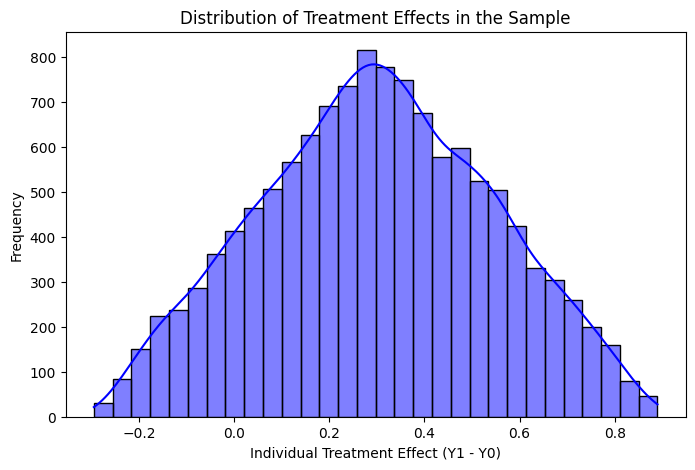

In [189]:
case1df['treatment_effect'] = case1df['Y1'] - case1df['Y0']

plt.figure(figsize=(8, 5))
sns.histplot(case1df['treatment_effect'], kde=True, bins=30, color='blue')

plt.xlabel("Individual Treatment Effect (Y1 - Y0)")
plt.ylabel("Frequency")
plt.title("Distribution of Treatment Effects in the Sample")
plt.show()

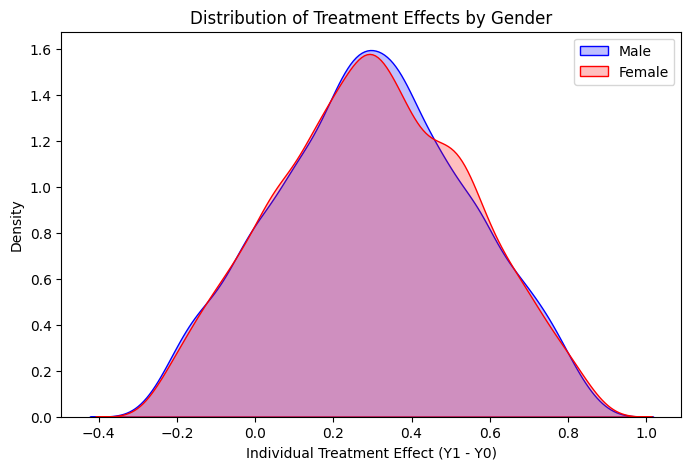

In [190]:
#density for males and females
plt.figure(figsize=(8, 5))

sns.kdeplot(case1df.loc[case1df['male'] == 1, 'treatment_effect'], label="Male", color="blue", fill=True)
sns.kdeplot(case1df.loc[case1df['male'] == 0, 'treatment_effect'], label="Female", color="red", fill=True)

plt.xlabel("Individual Treatment Effect (Y1 - Y0)")
plt.ylabel("Density")
plt.title("Distribution of Treatment Effects by Gender")
plt.legend()

plt.show()

In [191]:
#mean treatment effects for males and females
mean_treatment_effects = case1df.groupby('male')['treatment_effect'].mean()
print(mean_treatment_effects)

std_treatment_effects = case1df.groupby('male')['treatment_effect'].std()
print(std_treatment_effects)

male
0    0.300332
1    0.297812
Name: treatment_effect, dtype: float32
male
0    0.245065
1    0.244927
Name: treatment_effect, dtype: float32


In [192]:
#control for income and pre-treatment scores
X = case1df[['treated', 'male', 'treated_male', 'pre_totnorm', 'income']]
X = sm.add_constant(X)
y = case1df['treatment_effect']  #true treatment effect Y1 - Y0

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       treatment_effect   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1549
Date:                Sat, 08 Feb 2025   Prob (F-statistic):              0.979
Time:                        01:10:55   Log-Likelihood:                -153.02
No. Observations:               12415   AIC:                             318.0
Df Residuals:                   12409   BIC:                             362.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3015      0.012     24.711   

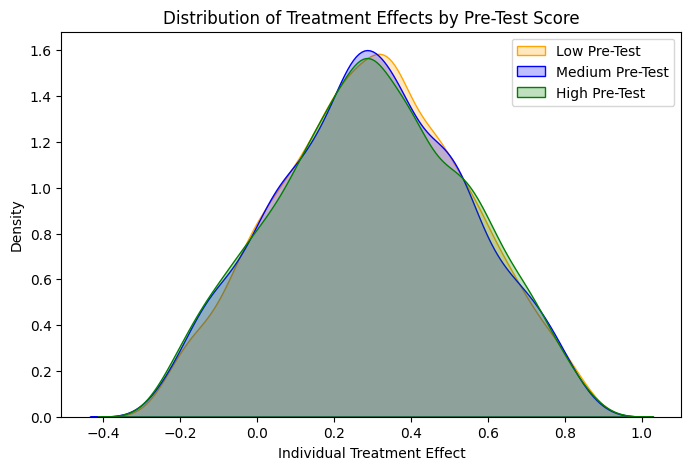

In [193]:
#define pre-test groups (terciles: low, medium, high)
low, high = np.percentile(case1df['pre_totnorm'], [33, 67])
case1df['pretest_group'] = np.select(
    [case1df['pre_totnorm'] <= low, case1df['pre_totnorm'] >= high],
    ['Low Pre-Test', 'High Pre-Test'],
    default='Medium Pre-Test'
)

plt.figure(figsize=(8, 5))
sns.kdeplot(case1df.loc[case1df['pretest_group'] == 'Low Pre-Test', 'treatment_effect'], 
            label="Low Pre-Test", color="orange", fill=True)
sns.kdeplot(case1df.loc[case1df['pretest_group'] == 'Medium Pre-Test', 'treatment_effect'], 
            label="Medium Pre-Test", color="blue", fill=True)
sns.kdeplot(case1df.loc[case1df['pretest_group'] == 'High Pre-Test', 'treatment_effect'], 
            label="High Pre-Test", color="green", fill=True)

plt.xlabel("Individual Treatment Effect")
plt.ylabel("Density")
plt.title("Distribution of Treatment Effects by Pre-Test Score")
plt.legend()
plt.show()

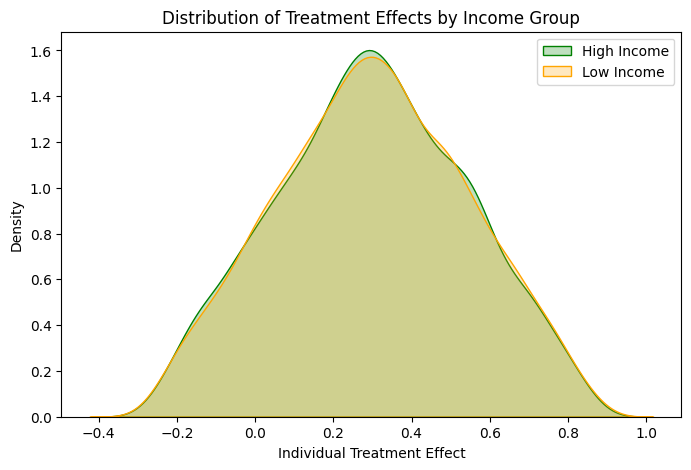

In [194]:
#define income groups (split at median)
income_median = case1df['income'].median()
case1df['income_group'] = np.where(case1df['income'] >= income_median, 'High Income', 'Low Income')

plt.figure(figsize=(8, 5))
sns.kdeplot(case1df.loc[case1df['income_group'] == 'High Income', 'treatment_effect'], label="High Income", color="green", fill=True)
sns.kdeplot(case1df.loc[case1df['income_group'] == 'Low Income', 'treatment_effect'], label="Low Income", color="orange", fill=True)
plt.xlabel("Individual Treatment Effect")
plt.ylabel("Density")
plt.title("Distribution of Treatment Effects by Income Group")
plt.legend()
plt.show()

In [195]:
#define subgroups
subgroups = {
    'Pre-Test Score': 'pretest_group',  #low, medium, high pre-test
    'Income': 'income_group',  #low vs high income
    'Gender': 'male' 
}

summary_results = []

#summary statistics for each subgroup
for category, col in subgroups.items():
    temp_summary = case1df.groupby(col)['treatment_effect'].agg(
        Mean='mean',
        Std_Dev='std',
        P25=lambda x: np.percentile(x, 25),
        P50=lambda x: np.percentile(x, 50),
        P75=lambda x: np.percentile(x, 75)
    ).reset_index()
    
    temp_summary.insert(0, "Category", category)  
    summary_results.append(temp_summary)

summary_table = pd.concat(summary_results, ignore_index=True)
summary_table.rename(columns={subgroups['Gender']: 'Gender', subgroups['Pre-Test Score']: 'Pre-Test Score', subgroups['Income']: 'Income Group'}, inplace=True)

display(summary_table)

,Category,Pre-Test Score,Mean,Std_Dev,P25,P50,P75,Income Group,Gender
0,Pre-Test Score,High Pre-Test,0.298222,0.247660,0.121498,0.295237,0.481454,NaN,NaN
1,Pre-Test Score,Low Pre-Test,0.302054,0.242387,0.128143,0.304194,0.476226,NaN,NaN
2,Pre-Test Score,Medium Pre-Test,0.296785,0.244971,0.122010,0.293986,0.474852,NaN,NaN
3,Income,NaN,0.298422,0.244677,0.123814,0.297367,0.476740,High Income,NaN
4,Income,NaN,0.299728,0.245319,0.124666,0.297946,0.477550,Low Income,NaN
5,Gender,NaN,0.300332,0.245065,0.125617,0.298326,0.481655,NaN,0.0
6,Gender,NaN,0.297812,0.244927,0.122693,0.297373,0.472799,NaN,1.0


Q1 (k)

For an individual, the true treatment effect is Y1 - Y0, so the true treatment effect is the sum of these across the population. We find that the true treatment effect is 0.2991. This is quite close to our estimate of 0.2983. 

CASE 2

In [196]:
case2df

,studentid,std,male,numstud,pre_totnorm,income,treated,side,Finalscore,Y0,Y1
0,1,3,1,57,-0.232094,117.753838,0.0,0.0,-0.450208,-0.450208,-0.210228
1,3,3,1,57,-0.838519,134.156433,1.0,0.0,-1.221505,-0.677504,-1.221505
2,4,3,1,57,2.921314,221.849289,0.0,1.0,3.080725,3.080725,3.388318
3,7,3,1,57,-0.717234,103.251457,1.0,0.0,-1.000998,-0.630131,-1.000998
4,8,3,1,57,-0.656591,171.015793,1.0,0.0,-0.979446,-0.423863,-0.979446
...,...,...,...,...,...,...,...,...,...,...,...
12410,17483,3,1,60,0.071118,148.126923,0.0,1.0,0.271406,0.271406,0.665201
12411,17494,3,0,41,-1.141731,136.820877,1.0,1.0,-0.866799,-1.130276,-0.866799
12412,17495,3,1,60,-0.050167,145.110672,0.0,1.0,-0.120390,-0.120390,0.040297
12413,17497,4,0,36,1.746789,168.863739,0.0,1.0,1.707076,1.707076,1.958068


In [197]:
#load dataset case2 using python equivalent of describe command in Stata
case2dfmeta, meta = pyreadstat.read_dta(case2file_path, metadataonly=True)

if meta.column_labels:
    print("Variable Labels (Descriptions):")
    for var, label in zip(meta.column_names, meta.column_labels):
        print(f"{var}: {label}")
else:
    print("No variable labels found in the dataset.")

Variable Labels (Descriptions):
studentid: Student ID
std: Grade
male: Male
numstud: Number of students in school-grade
pre_totnorm: Normalized total score on pre-test
income: income
treated: unit receives treatment
side: unobservable variable
Finalscore: Post-treatment test-score
Y0: counterfactual for no treatment
Y1: counterfactual for treatment


In [198]:
covariates = ['std', 'male', 'numstud', 'pre_totnorm', 'income']
treatment = 'treated'  

balance_results = []

for cov in covariates:
    df = case2df[[cov, treatment]] 

    X = df[treatment]  
    X = sm.add_constant(X)  
    y = df[cov]

    model = sm.OLS(y, X).fit()

    coef = model.params[treatment]
    se = model.bse[treatment]
    p_val = model.pvalues[treatment]

    balance_results.append([cov, coef, se, p_val])

balance_regression_table = pd.DataFrame(balance_results, columns=['Variable', 'Coefficient (β₁)', 'Std. Error', 'p-value'])
display(balance_regression_table)

,Variable,Coefficient (β₁),Std. Error,p-value
0,std,-0.005656,0.008973,0.528442
1,male,-0.000893,0.008976,0.920778
2,numstud,0.071613,0.466603,0.878025
3,pre_totnorm,-0.015700,0.018030,0.383883
4,income,-0.525120,0.752830,0.485485


Q1 (l)
We determine that the p-value for each of these is nonsignificant (>0.38) with many coefficients near zero, which suggests that the control and treatments are well balanced.

In [199]:
c2outcome = 'Finalscore'  
c2treatment = 'treated'  

c2X = case2df[[c2treatment]] 
c2y = case2df[c2outcome]
c2X = sm.add_constant(c2X)
c2model = sm.OLS(c2y, c2X).fit(cov_type='HC3')  

print(c2model.summary())

                            OLS Regression Results                            
Dep. Variable:             Finalscore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.787
Date:                Sat, 08 Feb 2025   Prob (F-statistic):             0.0951
Time:                        01:10:56   Log-Likelihood:                -18029.
No. Observations:               12415   AIC:                         3.606e+04
Df Residuals:                   12413   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0340      0.013      2.632      0.0

Q1 (m)
We estimate the causal effect by naive regression as 0.0310. This is not technically significant at the 95% confidence level, but it is 0.095 which is still reasonably close.

In [200]:
c2controls2 = ['pre_totnorm'] 

c2X2 = case2df[['treated']] 
c2y2 = case2df['Finalscore']  
c2model2 = sm.OLS(c2y2, c2X2).fit(cov_type='HC3') 

print(c2model2.summary())

                                 OLS Regression Results                                
Dep. Variable:             Finalscore   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              23.72
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                    1.13e-06
Time:                        01:10:56   Log-Likelihood:                         -18033.
No. Observations:               12415   AIC:                                  3.607e+04
Df Residuals:                   12414   BIC:                                  3.607e+04
Df Model:                           1                                                  
Covariance Type:                  HC3                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

Q1 (n)
We find that by removing the constant term, we actually reduce the p-value from 0.09 to about 0, and double our estimate from 0.0310 to 0.0650. This is in some ways perhaps preferable to our earlier estimate.

In [201]:
#treatment with income interaction
case2df['treated_income'] = case2df['treated'] * case2df['income']

c2X4 = case2df[['treated', 'income', 'treated_income']] 
c2y4 = case2df['Finalscore']

c2model4 = sm.OLS(c2y4, c2X4).fit(cov_type='HC3') 

print(c2model4.summary())

                                 OLS Regression Results                                
Dep. Variable:             Finalscore   R-squared (uncentered):                   0.271
Model:                            OLS   Adj. R-squared (uncentered):              0.271
Method:                 Least Squares   F-statistic:                              2547.
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                        0.00
Time:                        01:10:56   Log-Likelihood:                         -16085.
No. Observations:               12415   AIC:                                  3.218e+04
Df Residuals:                   12412   BIC:                                  3.220e+04
Df Model:                           3                                                  
Covariance Type:                  HC3                                                  
                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

In [202]:
#treatment interaction with male
case2df['treated_male'] = case2df['treated'] * case2df['male']

c2X5 = case2df[['treated', 'male', 'treated_male']] 
c2y5 = case2df['Finalscore']

c2model5 = sm.OLS(c2y5, c2X5).fit(cov_type='HC3') 

print(c2model5.summary())

                                 OLS Regression Results                                
Dep. Variable:             Finalscore   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              10.34
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                    8.52e-07
Time:                        01:10:56   Log-Likelihood:                         -18029.
No. Observations:               12415   AIC:                                  3.606e+04
Df Residuals:                   12412   BIC:                                  3.609e+04
Df Model:                           3                                                  
Covariance Type:                  HC3                                                  
                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

In [203]:
#treatment with pre_totnorm interaction
case2df['treated_pre_totnorm'] = case2df['treated'] * case2df['pre_totnorm']

c2X6 = case2df[['treated', 'pre_totnorm', 'treated_pre_totnorm']] 
c2y6 = case2df['Finalscore']

c2model6 = sm.OLS(c2y6, c2X6).fit(cov_type='HC3')  

print(c2model6.summary())

                                 OLS Regression Results                                
Dep. Variable:             Finalscore   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          9.168e+04
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                        0.00
Time:                        01:10:56   Log-Likelihood:                         -333.26
No. Observations:               12415   AIC:                                      672.5
Df Residuals:                   12412   BIC:                                      694.8
Df Model:                           3                                                  
Covariance Type:                  HC3                                                  
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

Q1 (o)

In subgroup analysis, we only find that income is a significant; the treatment effect seems to differ only along income level because the interaction term is nonzero and significant.

In [204]:
true_ate2 = (case2df['Y1'] - case2df['Y0']).mean()
print(f"True Average Treatment Effect: {true_ate:.4f}")

True Average Treatment Effect: 0.2991


/var/folders/k7/qpdvs2d90yx6n0tx8c1_tj8c0000gn/T/ipykernel_21719/2572148174.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(case2df.loc[case2df['high_income'] == 1, 'treatment_effect'], label="High Income", color='green', shade=True)
/var/folders/k7/qpdvs2d90yx6n0tx8c1_tj8c0000gn/T/ipykernel_21719/2572148174.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(case2df.loc[case2df['high_income'] == 0, 'treatment_effect'], label="Low Income", color='purple', shade=True)


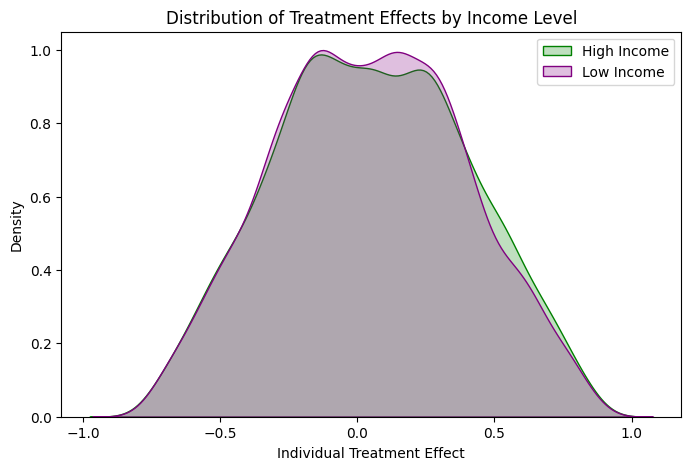

In [205]:
case2df['treatment_effect'] = case2df['Y1'] - case2df['Y0']

income_threshold = case2df['income'].median()

#create binary income groups
case2df['high_income'] = (case2df['income'] > income_threshold).astype(int)

#density curves by income
plt.figure(figsize=(8, 5))
sns.kdeplot(case2df.loc[case2df['high_income'] == 1, 'treatment_effect'], label="High Income", color='green', shade=True)
sns.kdeplot(case2df.loc[case2df['high_income'] == 0, 'treatment_effect'], label="Low Income", color='purple', shade=True)

plt.xlabel("Individual Treatment Effect")
plt.ylabel("Density")
plt.title("Distribution of Treatment Effects by Income Level")
plt.legend()
plt.show()

In [206]:
#summary statistics
summary_table_income = case2df.groupby('high_income')['treatment_effect'].agg(
    Mean='mean',
    Std_Dev='std',
    P25=lambda x: np.percentile(x, 25),
    P50=lambda x: np.percentile(x, 50),
    P75=lambda x: np.percentile(x, 75)
).reset_index()

#rename the binary column for readability
summary_table_income['high_income'] = summary_table_income['high_income'].map({0: "Low Income", 1: "High Income"})

display(summary_table_income)

,high_income,Mean,Std_Dev,P25,P50,P75
0,Low Income,0.042111,0.34645,-0.213772,0.041403,0.294545
1,High Income,0.050656,0.35272,-0.206823,0.047018,0.310085


Q1 (p)

We determine that the true treatment effect is 0.2991, which is quite far from our earlier naive estimate(s) of 0.065 (0.031 with constant term). 

/var/folders/k7/qpdvs2d90yx6n0tx8c1_tj8c0000gn/T/ipykernel_21719/114455405.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(case2df.loc[case2df['side'] == 0, 'treatment_effect'],
/var/folders/k7/qpdvs2d90yx6n0tx8c1_tj8c0000gn/T/ipykernel_21719/114455405.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(case2df.loc[case2df['side'] == 1, 'treatment_effect'],


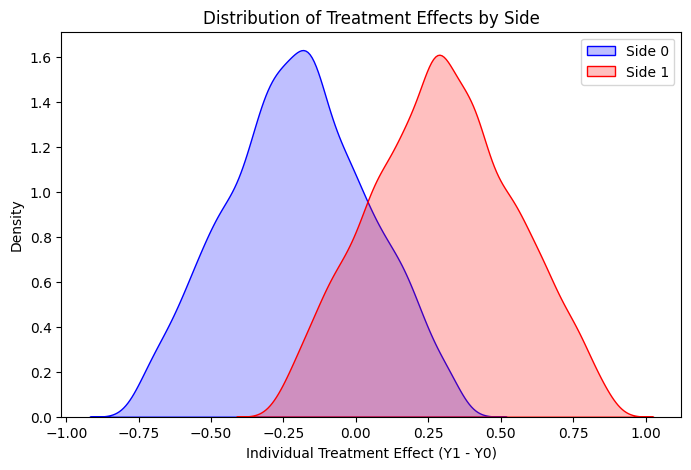

In [207]:
#treatment effect
case2df['treatment_effect'] = case2df['Y1'] - case2df['Y0']

#density curves for side == 0 and side == 1
plt.figure(figsize=(8, 5))
sns.kdeplot(case2df.loc[case2df['side'] == 0, 'treatment_effect'], 
            label="Side 0", color='blue', shade=True)
sns.kdeplot(case2df.loc[case2df['side'] == 1, 'treatment_effect'], 
            label="Side 1", color='red', shade=True)

plt.xlabel("Individual Treatment Effect (Y1 - Y0)")
plt.ylabel("Density")
plt.title("Distribution of Treatment Effects by Side")
plt.legend()
plt.show()

Q1 (q)
Clearly, we see that there are clearly heterogenous effects for the treatment across the population. This could explain why our estimate for the treatment effect was farther from the true value than in case 1. Without controlling for 'side', our estimate will obviously be biased.

In [208]:
print(case2df[['side', 'treated']].corr())

             side   treated
side     1.000000 -0.007995
treated -0.007995  1.000000


Q1 (r)

Since we see the distribution for 'side'==1 is shifted far to the right relative to 'side'==0, it is clear that individuals in 'side'==1 benefit much more from the treatment. In fact, side=1 appears to be centered at a positive treatment value, while side=0 appears centered at a negative value, suggesting their test scores worsen after treatment. Thus, our estimate for the average treatment effect will be influenced by the fraction of individuals in the study who are in 'side'==1. If we use a disproportionately larger number, then the average treatment effect will be larger. If the unobserved variable is total wealth, then it has signficant implications for intervention; we may have overestimated the treatment effect if in fact wealth is more impactful than the treatment effect. However, we find that 'side' and 'treated' are almost uncorrelated (correlation is -0.007995), so it is much more unlikely that such a phenomenon could hold.

CASE 3

In [209]:
#load dataset case3 using python equivalent of describe command in Stata
case3dfmeta, meta = pyreadstat.read_dta(case3file_path, metadataonly=True)

if meta.column_labels:
    print("Variable Labels (Descriptions):")
    for var, label in zip(meta.column_names, meta.column_labels):
        print(f"{var}: {label}")
else:
    print("No variable labels found in the dataset.")

Variable Labels (Descriptions):
studentid: Student ID
std: Grade
male: Male
numstud: Number of students in school-grade
pre_totnorm: Normalized total score on pre-test
income: income
TreatmentGroup: unit is assigned to treatment
treated: the unit assigned to treatment is actually treated
Finalscore: Post-treatment test-score
Y0: counterfactual for no treatment
Y1: counterfactual for treatment


In [210]:
case3df

,studentid,std,male,numstud,pre_totnorm,income,TreatmentGroup,treated,Finalscore,Y0,Y1
0,1,3,1,57,-0.232094,117.753838,0.0,0.0,-0.453978,-0.453978,-0.214589
1,3,3,1,57,-0.838519,134.156433,1.0,0.0,-0.990260,-0.990260,-1.015372
2,4,3,1,57,2.921314,221.849289,0.0,0.0,2.997222,2.997222,3.066413
3,7,3,1,57,-0.717234,103.251457,1.0,1.0,-0.709478,-0.731756,-0.709478
4,8,3,1,57,-0.656591,171.015793,1.0,0.0,-0.890137,-0.890137,-0.882236
...,...,...,...,...,...,...,...,...,...,...,...
12410,17483,3,1,60,0.071118,148.126923,0.0,0.0,-0.010397,-0.010397,-0.010331
12411,17494,3,0,41,-1.141731,136.820877,1.0,0.0,-1.052468,-1.052468,-1.344774
12412,17495,3,1,60,-0.050167,145.110672,0.0,0.0,-0.265305,-0.265305,0.076901
12413,17497,4,0,36,1.746789,168.863739,0.0,0.0,1.541587,1.541587,1.949705


In [211]:
covariates = ['std', 'male', 'numstud', 'pre_totnorm', 'income']
treatment = 'treated' 

balance_results = []

for cov in covariates:
    df = case3df[[cov, treatment]] 

    X = df[treatment] 
    X = sm.add_constant(X) 
    y = df[cov]

    model = sm.OLS(y, X).fit()

    coef = model.params[treatment]
    se = model.bse[treatment]
    p_val = model.pvalues[treatment]

    balance_results.append([cov, coef, se, p_val])

balance_regression_table = pd.DataFrame(balance_results, columns=['Variable', 'Coefficient (β₁)', 'Std. Error', 'p-value'])
display(balance_regression_table)

,Variable,Coefficient (β₁),Std. Error,p-value
0,std,0.004029,0.009417,6.687443e-01
1,male,-0.009495,0.009420,3.134690e-01
2,numstud,-0.059512,0.489714,9.032776e-01
3,pre_totnorm,0.219229,0.018821,3.399931e-31
4,income,15.019087,0.778548,9.967536e-82


Q1 (s)
We determine that the predictors std, male, and numstud have p-values far enough above 0.05 that it is fair to say randomization holds. However, we find significant p-values for pre_totnorm and income–the coefficient for income is quite large (15.019).


In [212]:
#subset only individuals who were assigned to treatment
treatment_subsample = case3df[case3df['TreatmentGroup'] == 1].copy()

#binary dropout indicator (1 = dropped out, 0 = remained in treatment)
treatment_subsample['dropout'] = (treatment_subsample['treated'] == 0).astype(int)

#check the dropout rate
print("Dropout Rate:", treatment_subsample['dropout'].mean())

Dropout Rate: 0.30676715843489416


In [213]:
#define independent variables (covariates predicting dropout)
X = treatment_subsample[['male', 'income', 'pre_totnorm', 'numstud']]
X = sm.add_constant(X) 
y = treatment_subsample['dropout'] 

#run logistic regression to model probability of dropping out
logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.551022
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                dropout   No. Observations:                 6236
Model:                          Logit   Df Residuals:                     6231
Method:                           MLE   Df Model:                            4
Date:                Sat, 08 Feb 2025   Pseudo R-squ.:                  0.1062
Time:                        01:10:57   Log-Likelihood:                -3436.2
converged:                       True   LL-Null:                       -3844.4
Covariance Type:            nonrobust   LLR p-value:                2.037e-175
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.3645      0.174     13.586      0.000       2.023       2.706
male            0.0404    

Q1 (t)
Running a logistic regression as a proxy for the probability of dropping out, as determined by male, income, pre_totnorm, and numstud, we find that income, pre_totnorm, and constant terms are significant. Male and numstud are both nonsignificant, indicating these are not strongly predictive of dropout probability. We see income has a slightly negative coefficient, suggesting higher income students are less likely to drop out. Pre_totnorm has a positive coefficient, indicating stronger students are more likely to drop out–this suggest some positive self-selection may be at work. 

In [214]:
X = case3df[['TreatmentGroup', 'income', 'pre_totnorm']]  #only assignment to treatment
X = sm.add_constant(X) 
y = case3df['Finalscore']  

#OLS regression for ITT
itt_model = sm.OLS(y, X).fit(cov_type='HC3')

print(itt_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Finalscore   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.181e+05
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:10:57   Log-Likelihood:                 2542.7
No. Observations:               12415   AIC:                            -5077.
Df Residuals:                   12411   BIC:                            -5048.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0990      0.009    -10.

Q1 (u)

We now measure the intention to treat (ITT) effect by running the regression: finalscore_i = beta_0 + beta_1 * TreatmentGroup_i + beta_2 * income_i + beta_3 * pre_totnorm + epsilon_i. We find that every cofficient is positive and significant. The coefficient for income is quite small, but has even smaller standard error. This suggests that across all these factors, being assigned to treatment increases average test score. This is an unsurprising result.

From a policy perspective, ITT is important because not everyone assigned to treatment will actually participate and ITT thus reflects the practical effect of making the treatment available. 

In [215]:
X = case3df[['treated']]  #only treatment status (no controls)
X = sm.add_constant(X)  
y = case3df['Finalscore']  

naive_model = sm.OLS(y, X).fit(cov_type='HC3') 

print(naive_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Finalscore   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     704.7
Date:                Sat, 08 Feb 2025   Prob (F-statistic):          4.47e-151
Time:                        01:10:57   Log-Likelihood:                -17795.
No. Observations:               12415   AIC:                         3.559e+04
Df Residuals:                   12413   BIC:                         3.561e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0494      0.011     -4.465      0.0

Q1 (v)

It is important to note that we have a dropout bias here. Running our naive regression, we select for people who actually took the treatment. If there is any systematic bias in dropping out then we run the risk of omitted variable bias, because treated = 1 is not random and a significant determinant is missing. The ideal causal estimate would be treatment vs. not assigned treatment (ITT) rather than treated vs. untreated.

In [216]:
Y = case3df['Finalscore'] 
D = case3df['treated']  #endogenous treatment variable
Z = case3df['TreatmentGroup']  #instrument (assignment to treatment)
X = case3df[['pre_totnorm', 'income', 'numstud', 'male']]  #controls

X = sm.add_constant(X)

#run IV 2SLS regression
iv_model = IV2SLS(Y, X, endog=D, instruments=Z).fit(cov_type="robust")

print(iv_model.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:             Finalscore   R-squared:                      0.9722
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9722
No. Observations:               12415   F-statistic:                  4.36e+05
Date:                Sat, Feb 08 2025   P-value (F-stat)                0.0000
Time:                        01:10:57   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const          -0.0023     0.0092    -0.2464     0.8054     -0.0204      0.0158
pre_totnorm     1.0005     0.0023     440.63    

In [217]:
itt_coef = itt_model.params['TreatmentGroup']
print(f"ITT Effect: {itt_coef:.4f}")

late_coef = iv_model.params['treated']
print(f"LATE Effect: {late_coef:.4f}")

ITT Effect: 0.2075
LATE Effect: 0.2996


Q1 (w)

The naive estimate of beta1, 0.5162 (coefficient for treated), is larger than the coefficient for treated here, 0.2996, p-val = 0. Thus, we deduce that the dropouts were positively selected, meaning higher-achieving students stayed. Mathematically: ITT = LATE * P( Treatment administered | Treatment assigned). Thus, since probability is between 0 and 1, ITT will always be smaller than LATE. 

In [218]:
true_ate = (case3df['Y1'] - case3df['Y0']).mean()
print(f"True Average Treatment Effect: {true_ate:.4f}")

True Average Treatment Effect: 0.1429


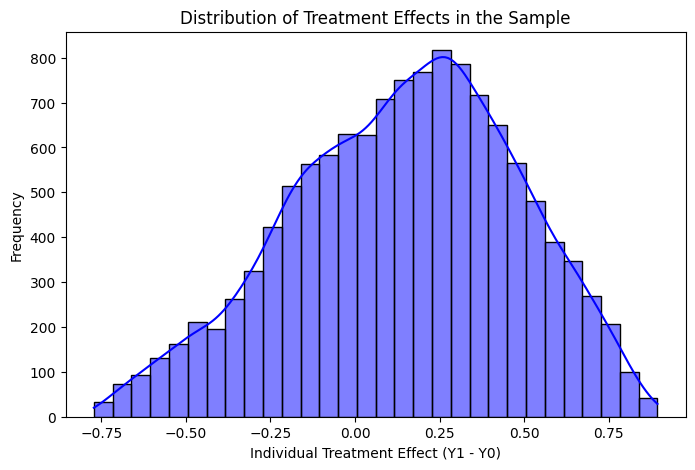

In [219]:
case3df['treatment_effect'] = case3df['Y1'] - case3df['Y0']

plt.figure(figsize=(8, 5))
sns.histplot(case3df['treatment_effect'], kde=True, bins=30, color='blue')

plt.xlabel("Individual Treatment Effect (Y1 - Y0)")
plt.ylabel("Frequency")
plt.title("Distribution of Treatment Effects in the Sample")

plt.show()

Q1 (x)
We estimate the true treatment effect as 0.1429. 

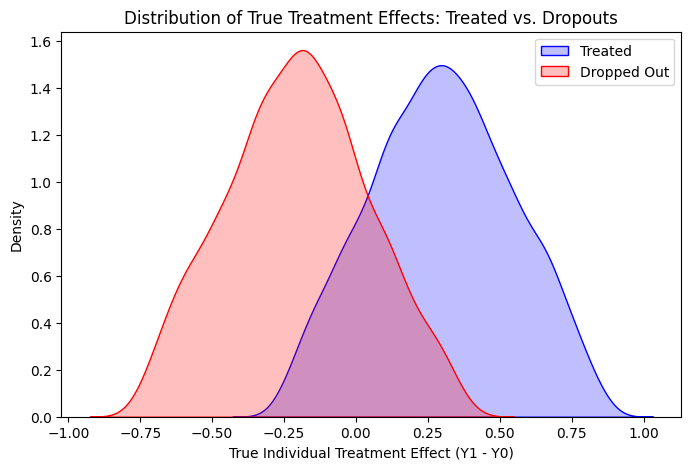

In [159]:
#individuals assigned to treatment
treated_subsample = case3df[case3df['TreatmentGroup'] == 1].copy()

#individual true treatment effect
treated_subsample['true_treatment_effect'] = treated_subsample['Y1'] - treated_subsample['Y0']

#density curves by treatment status (treated vs. dropout)
plt.figure(figsize=(8, 5))
sns.kdeplot(treated_subsample.loc[treated_subsample['treated'] == 1, 'true_treatment_effect'], 
            label="Treated", color='blue', fill=True)
sns.kdeplot(treated_subsample.loc[treated_subsample['treated'] == 0, 'true_treatment_effect'], 
            label="Dropped Out", color='red', fill=True)

plt.xlabel("True Individual Treatment Effect (Y1 - Y0)")
plt.ylabel("Density")
plt.title("Distribution of True Treatment Effects: Treated vs. Dropouts")
plt.legend()
plt.show()

Q1 (y)

We have that the red graph is the dropout group and the blue is the treated. We notice that these distributions are quite different. Thus suggests that dropout was not random–those who dropped out had some systematic difference relative to those who stayed. Since we see the mean of the treated group is larger, it is clear that individuals who stayed benefitted more. This pattern is consistent with rationality because if individuals were fully rational and could correctly anticipate their own treatment effect and made optimal choices, we would expect only individuals who expect high returns from treatment to stay in the program. Also, individuals who do not anticipate receiving much benefit from the program will drop.

Q1 (z)

I practiced decomposing variables and running regression so that we can get a better estimate for causal effects, and experienced how regressions that seem to run smoothly and lead to useful inferences may have significant bias.

Q2

I looked through the studies you sent over email the other day–really appreciate it. I downloaded both including their replication packages but found that each has disclaimers saying that some data will be inaccessible–I'll look through these more carefully to determine if I can still replicate enough of one of these papers for the purposes of this class or find another paper with more freely accessible data. I'm sorry for the delay